## Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

- Построить точечный график
- Рассчитать коэффициенты корреляции Пирсона и Спирмена
- Построить модель линейной регрессии
- Рассчитать коэффициент детерминации
- Вывести график остатков

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [2]:
df = pd.read_csv('water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


### Строим точечный график

<AxesSubplot: xlabel='hardness', ylabel='mortality'>

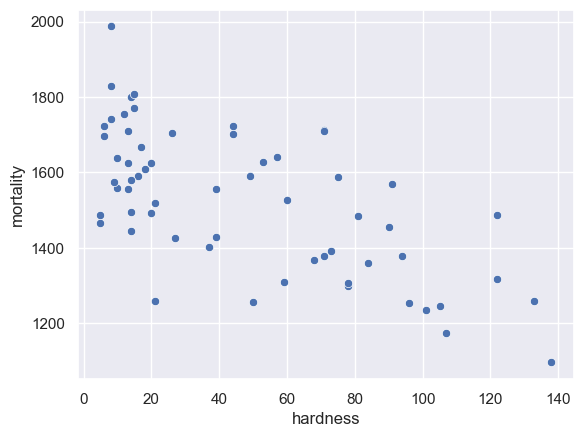

In [4]:
sns.scatterplot(data=df, x='hardness', y='mortality')

График показывает некоторую отрицательную корреляцию. Чем выше жесткость воды тем ниже смертность, или наоборот

### Рассчитаем коэффициэнты

In [5]:
df[['hardness', 'mortality']].corr() # коэф-т корреляции Пирсона

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [6]:
df[['hardness', 'mortality']].corr(method='spearman') # коэф-т корреляции Спирмена

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


Коэффициенты также показывают среднюю отрицательную зависимость

### Построим модель линейной регрессии

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [8]:
X=df[['hardness']]
y=df['mortality']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
model.coef_

array([-3.13167087])

In [12]:
model.intercept_ # По сути это означает, что наша зав-ть описывается уравнением y = -3.42x + 1671.7

1668.9722977277095

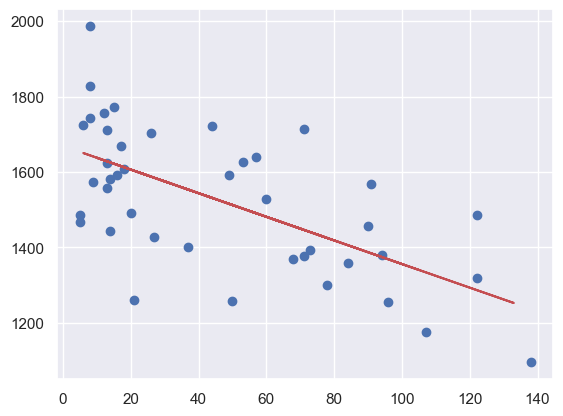

In [13]:
y_pred = model.predict(X_test)

plt.scatter(X_train,y_train)
plt.plot(X_test, y_pred, c='r')
plt.show()

### Вычислим коэф-т детерминации

In [14]:
model.score(X_test,y_test)

0.5046490611017092

### Построим график остатков

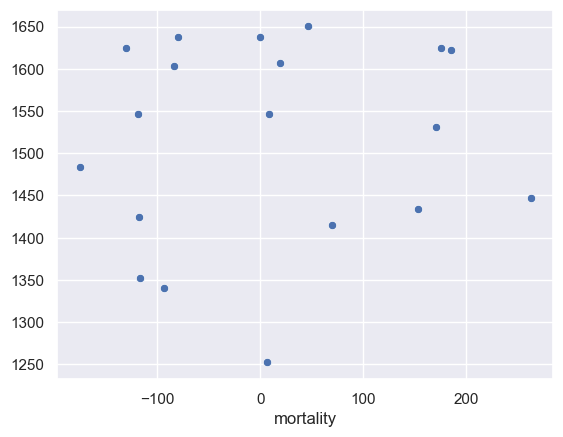

In [15]:
residuals = y_test-y_pred
sns.scatterplot(x=residuals,y=y_pred)
plt.show()

### А вообще я нашел метод, который меня заинтересовал больше

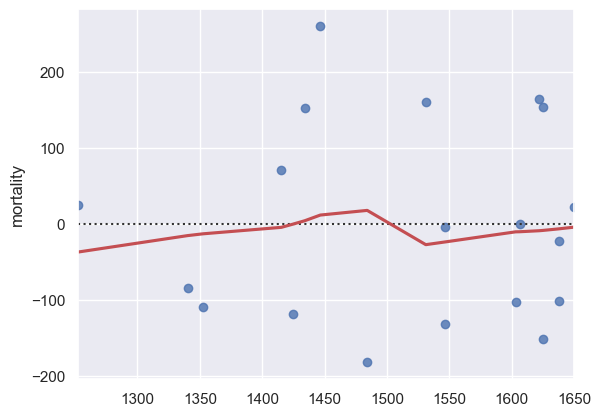

In [16]:
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color':'r'}) 
plt.show()

Scatter то тут правильный, а вот Line я не совсем понимаю, буду очень благодарен, если в ответе объясните мне суть данной линии

## Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

- Разделить данные на 2 группы
- Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [17]:
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [18]:
df_south = df.loc[df['location'] == 'South'].copy()
df_north = df.loc[df['location'] == 'North'].copy()

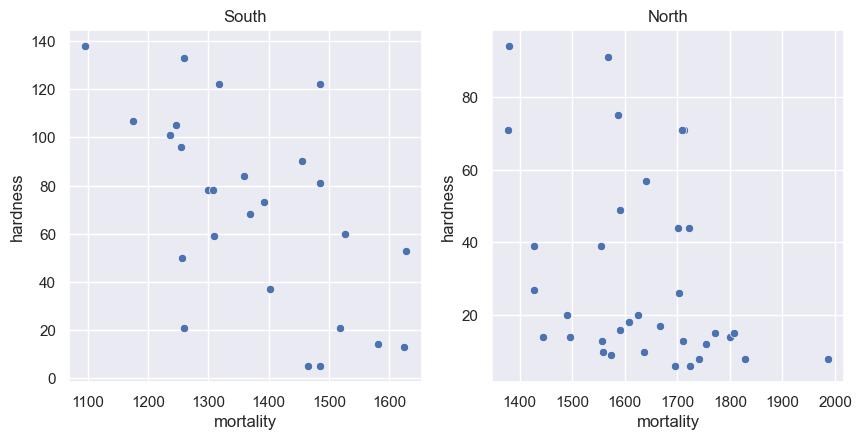

In [19]:
f, axs = plt.subplots(1, 2, figsize=(10,10))
sns.scatterplot(data=df_south, x='mortality', y='hardness', ax=axs[0])
sns.scatterplot(data=df_north, x='mortality', y='hardness', ax=axs[1])

axs[0].set_title('South')
axs[1].set_title('North')

x_left, x_right = axs[0].get_xlim()
y_low, y_high = axs[0].get_ylim()
axs[0].set_aspect(abs((x_right-x_left)/(y_low-y_high)))

x_left, x_right = axs[1].get_xlim()
y_low, y_high = axs[1].get_ylim()
axs[1].set_aspect(abs((x_right-x_left)/(y_low-y_high)))


plt.show()

In [20]:
print('Коэф. корреляции Пирсона')
print('\nNorth')
print(df_north[['mortality','hardness']].corr())
print('\nSouth')
print(df_south[['mortality','hardness']].corr())

Коэф. корреляции Пирсона

North
           mortality  hardness
mortality   1.000000 -0.368598
hardness   -0.368598  1.000000

South
           mortality  hardness
mortality   1.000000 -0.602153
hardness   -0.602153  1.000000


### Сперва для севера

In [21]:
X_n = df_north[['hardness']]
y_n = df_north['mortality']
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, random_state=3354, test_size=0.3)
model.fit(X_train_n, y_train_n)
y_pred_n = model.predict(X_test_n)

In [22]:
model.coef_

array([-1.67110211])

In [23]:
model.intercept_

1685.7921245504622

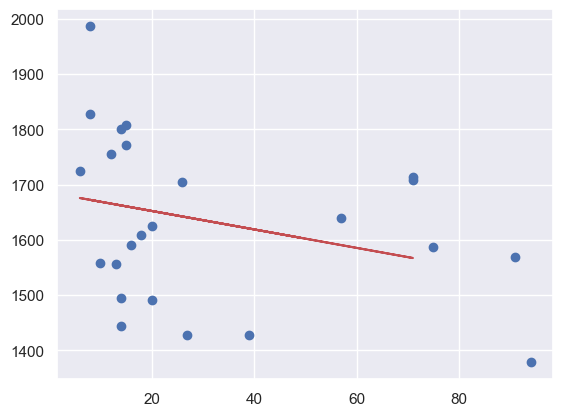

In [24]:
plt.scatter(X_train_n, y_train_n)
plt.plot(X_test_n, y_pred_n, c='r')
plt.show()

In [25]:
model.score(X_test_n, y_test_n)

0.30126001113828205

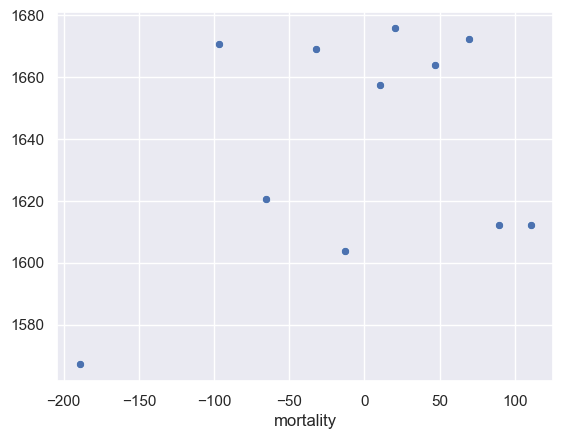

In [26]:
residuals_n = y_test_n-y_pred_n
sns.scatterplot(x=residuals_n,y=y_pred_n)
plt.show()

### Теперь для юга

In [27]:
X_s = df_south[['hardness']]
y_s = df_south['mortality']
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, random_state=3354, test_size=0.3)
model.fit(X_train_s, y_train_s)
y_pred_s = model.predict(X_test_s)

In [28]:
model.coef_

array([-1.40391708])

In [29]:
model.intercept_

1483.0818250910906

In [30]:
model.score(X_test_s, y_test_s)

0.4027577730705332

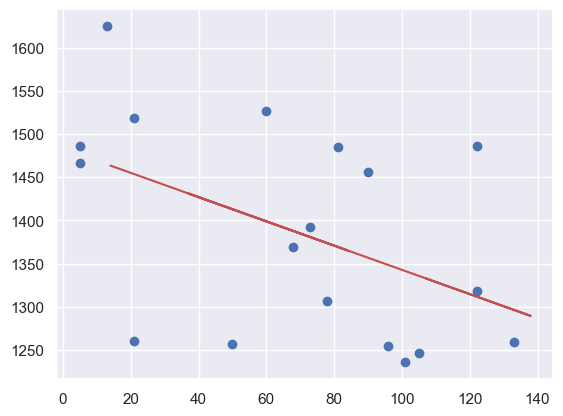

In [31]:
plt.scatter(X_train_s,y_train_s)
plt.plot(X_test_s, y_pred_s, c='r')
plt.show()

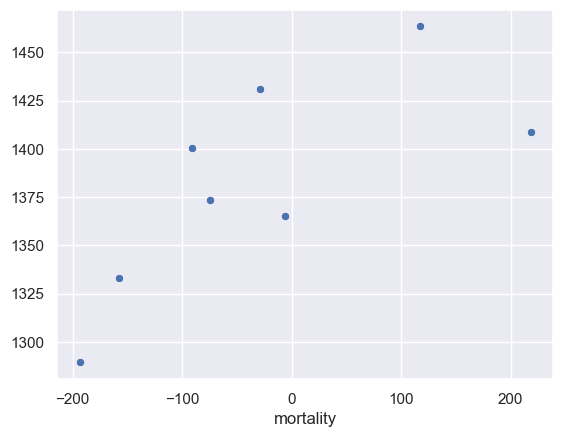

In [32]:
residuals_s = y_test_s-y_pred_s
sns.scatterplot(x=residuals_s,y=y_pred_s)
plt.show()

Для наглядности наложим всё друг на друга

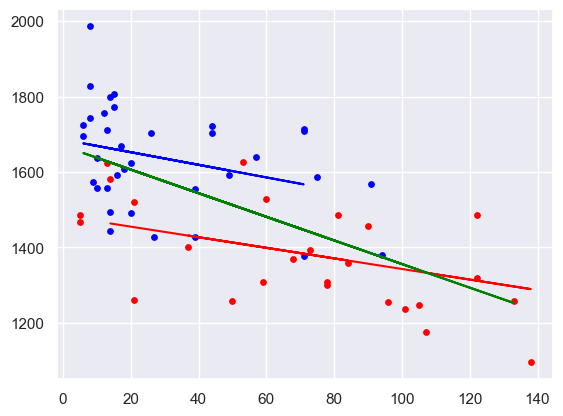

In [33]:
plt.plot(X_test_s, y_pred_s, color='red')
plt.scatter(X_s, y_s, color='red', s=15)

plt.plot(X_test_n, y_pred_n, color='blue')
plt.scatter(X_n, y_n, color='blue', s=15)

plt.plot(X_test, y_pred, color='green')

plt.show()

График может показаться несколько нагруженным, но он максимально информативен.

Мы видим, что в моделях обратная зависимость сохраняется, хоть она и не так сильна на севере, как на юге, что можно понять из представленных выше вычислений

Притом юг словно сдвинут относительно севера в область меньшей смертности, как таковой, а у севера больше значений находится в области низкой жесткости воды. Как именно это связано предпологать пока не буду. В сумме данные показатели дают картину,представленную зеленой линией.

Зеленые точки отсутствуют, поскольку сумма синих и красных и так дает полный список значений